In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import scipy.constants as cs
import uncertainties
from uncertainties import ufloat
import math

$$S_{V_J} = \frac{V_J^2}{B_N} = 4 k T R_L$$
This is the equation that relations the resistance to the noise. We measured in the power noise spectral density in units of $\sqrt{S_{V_J}}$ in nV/sqrt(Hz). We expect the resistance to be proportional to the noise squared We took our data after averaging 20 times at 3 different frequences for 8 different resistors

noise_1_kHz [ 5.63  5.57  6.48  7.   10.21 13.61 30.07 39.18]
expected_noise [ 0.8994778   1.2720537   2.84439856  4.02258701  8.99477801 12.72053705
 28.44398555 40.22587013]
slope1: 0.015715(32)
slope2_5: 0.016334(33)
slope6: 0.017282(34)
intercept1: 31.44(29)
intercept2_5: 27.45(28)
intercept6: 26.03(27)


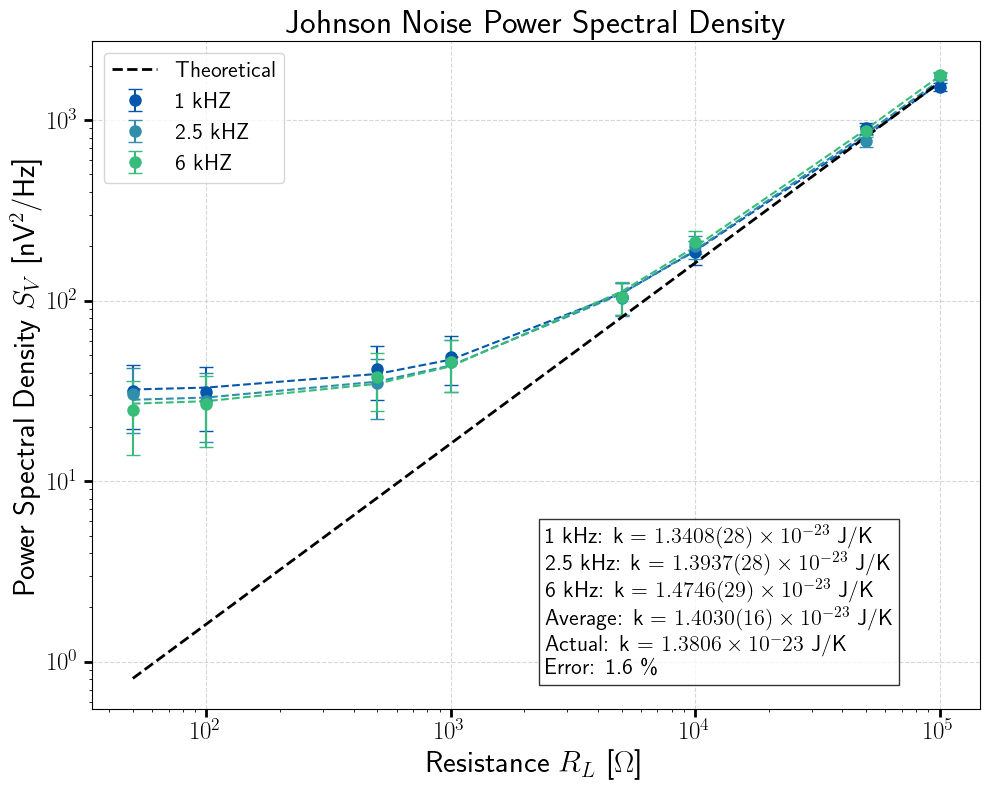

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import ufloat
import matplotlib.ticker as mtick
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit

plt.rcParams['text.usetex'] = True
DBlue = [x/256 for x in (4,87,172)]
LBlue = [x/256 for x in (48,143,172)]
BGreen = [x/256 for x in (55,189,121)]

resistances = np.array([50, 100, 500, 1000, 5000, 10000, 50000, 100000])
noise_1_kHz = np.array([5.63, 5.57, 6.48, 7.00, 10.21, 13.61, 30.07, 39.18])
noise_2_5_kHz = np.array([5.53, 5.29, 5.90, 6.77, 10.19, 14.14, 27.68, 41.78])
noise_6_kHz = np.array([4.99, 5.18, 6.15, 6.77, 10.24, 14.58, 29.48, 42.06])
uncertainty = 0.05

k = 1.380649e-23
T = 293
expected_noise = np.sqrt(4 * k * T * resistances) * 1e9

print("noise_1_kHz", noise_1_kHz)
print("expected_noise", expected_noise)
noise1   = np.array([ufloat(val, uncertainty) for val in noise_1_kHz])
noise2_5 = np.array([ufloat(val, uncertainty) for val in noise_2_5_kHz])
noise6   = np.array([ufloat(val, uncertainty) for val in noise_6_kHz])


noise_sq_1   = noise1 ** 2
noise_sq_2_5 = noise2_5 ** 2
noise_sq_6   = noise6 ** 2

noise_sq_1_nom = unp.nominal_values(noise_sq_1)
noise_sq_1_std = unp.std_devs(noise_sq_1)

noise_sq_2_5_nom = unp.nominal_values(noise_sq_2_5)
noise_sq_2_5_std = unp.std_devs(noise_sq_2_5)

noise_sq_6_nom = unp.nominal_values(noise_sq_6)
noise_sq_6_std = unp.std_devs(noise_sq_6)

def linear_model(x, m, c):
    return m * x + c

popt1, pcov1    = curve_fit(linear_model, resistances, noise_sq_1_nom,
                             sigma=noise_sq_1_std, absolute_sigma=True)
popt2_5, pcov2_5 = curve_fit(linear_model, resistances, noise_sq_2_5_nom,
                             sigma=noise_sq_2_5_std, absolute_sigma=True)
popt6, pcov6    = curve_fit(linear_model, resistances, noise_sq_6_nom,
                             sigma=noise_sq_6_std, absolute_sigma=True)

slope1     = ufloat(popt1[0], np.sqrt(pcov1[0, 0]))
intercept1 = ufloat(popt1[1], np.sqrt(pcov1[1, 1]))

slope2_5     = ufloat(popt2_5[0], np.sqrt(pcov2_5[0, 0]))
intercept2_5 = ufloat(popt2_5[1], np.sqrt(pcov2_5[1, 1]))

slope6     = ufloat(popt6[0], np.sqrt(pcov6[0, 0]))
intercept6 = ufloat(popt6[1], np.sqrt(pcov6[1, 1]))

slope = np.mean([[slope1, slope2_5, slope6]])
fit_line = 4*T*slope*resistances  # S_V = 4kTR, where slope ≈ k

fit_line_1   = linear_model(resistances, popt1[0], popt1[1])
fit_line_2_5 = linear_model(resistances, popt2_5[0], popt2_5[1])
fit_line_6   = linear_model(resistances, popt6[0], popt6[1])

plt.figure(figsize=(10, 8))

plt.errorbar(resistances, noise_1_kHz**2, yerr=((noise_1_kHz+1)*(noise_1_kHz+1)) - (noise_1_kHz*noise_1_kHz),
            fmt='o', color=DBlue, label='1 kHZ', capsize=5, markersize=8)
plt.plot(resistances, fit_line_1, '--', color=DBlue)

plt.errorbar(resistances, noise_2_5_kHz**2, yerr=((noise_2_5_kHz+1)*(noise_2_5_kHz+1)) - (noise_2_5_kHz*noise_2_5_kHz),
            fmt='o', color=LBlue, label='2.5 kHZ', capsize=5, markersize=8)
plt.plot(resistances, fit_line_2_5, '--', color=LBlue)

plt.errorbar(resistances, noise_6_kHz**2, yerr=((noise_6_kHz+1)*(noise_6_kHz+1)) - (noise_6_kHz*noise_6_kHz),
            fmt='o', color=BGreen, label='6 kHZ', capsize=5, markersize=8)
plt.plot(resistances, fit_line_6, '--', color=BGreen)

plt.plot(resistances, expected_noise**2, '--', color='black',
         label='Theoretical', linewidth=2)

plt.xlabel(r'Resistance $R_L$ [$\Omega$]', fontsize=22, fontweight='bold')
plt.ylabel(r'Power Spectral Density $S_V$ [nV$^2$/Hz]', fontsize=22, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=16)
plt.xscale('log')
plt.yscale('log')

conversion_factor = 1e-18 / (4 * T)
k_1   = slope1 * conversion_factor
k_2_5 = slope2_5 * conversion_factor
k_6   = slope6 * conversion_factor
k_avg = (k_1+k_2_5+k_6)/3

textstr = '\n'.join((
    '1 kHz: k = ' + f'${k_1:SL}$' + ' J/K',
    '2.5 kHz: k = ' + f'${k_2_5:SL}$'+ ' J/K',
    '6 kHz: k = ' + f'${k_6:SL}$'+ ' J/K',
    'Average: k = '+ f'${k_avg:SL}$'+ ' J/K',
    'Actual: k = '+ f'${1.3806} \\times 10^{-23}$'+ ' J/K',
    'Error: '+ f'{((k_avg-k)/k).nominal_value * 100:.1f} \\%'
))

print(f"slope1: {slope1:SL}")
print(f"slope2_5: {slope2_5:SL}")
print(f"slope6: {slope6:SL}")
print(f"intercept1: {intercept1:SL}")
print(f"intercept2_5: {intercept2_5:SL}")
print(f"intercept6: {intercept6:SL}")


plt.figtext(0.55, 0.15, textstr, fontsize=16, bbox=dict(facecolor='white', alpha=0.8))
plt.title('Johnson Noise Power Spectral Density', fontsize=24, fontweight='bold')
plt.tight_layout()
plt.savefig('johnson_noise.pdf', bbox_inches='tight', dpi=300)
plt.show()

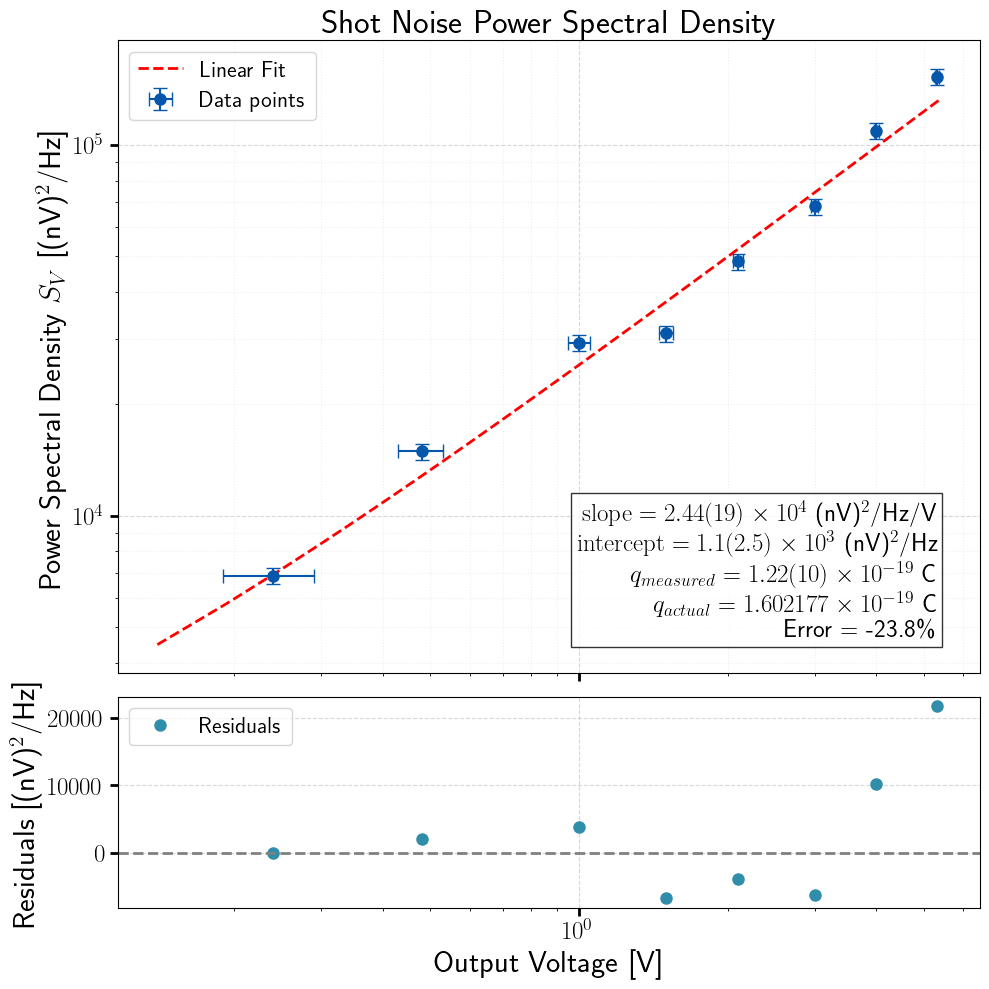

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.odr import ODR, Model, RealData
from uncertainties import ufloat

DBlue = [x/256 for x in (4,87,172)]
LBlue = [x/256 for x in (48,143,172)]
BGreen = [x/256 for x in (55,189,121)]

plt.rcParams['text.usetex'] = True

voltages = np.array([5.3, 3.0, 2.1, 1.0, 0.48, 0.24, 1.5, 4.0])
noises = np.array([390, 261, 220, 171, 122, 83, 176, 330])**2
noise_uncertainties = 0.05 * noises

def linear(B, x):
    m, b = B
    return m * x + b

model = Model(linear)
data = RealData(voltages, noises, sx=0.05, sy=noise_uncertainties)

init_slope = (noises.max() - noises.min()) / (voltages.max() - voltages.min())
init_intercept = noises.min() - init_slope * voltages.min()
odr = ODR(data, model, beta0=[init_slope, init_intercept])

output = odr.run()

slope_value = output.beta[0]
intercept_value = output.beta[1]
slope_error = output.sd_beta[0]
intercept_error = output.sd_beta[1]

slope_uf = ufloat(slope_value, slope_error)
intercept_uf = ufloat(intercept_value, intercept_error)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10),
                              gridspec_kw={'height_ratios': [3, 1]},
                              sharex=True)

ax1.errorbar(voltages, noises, xerr=0.05, yerr=noise_uncertainties, fmt='o', 
             color=DBlue, label='Data points', capsize=5, markersize=8)

x_fit = np.linspace(voltages.min() - 0.1, voltages.max() + 0.1, 100)
y_fit = linear(output.beta, x_fit)

ax1.plot(x_fit, y_fit, '--', color='red', label='Linear Fit', linewidth=2)

ax1.set_ylabel(r'Power Spectral Density $S_V$ [(nV)$^2$/Hz]', fontsize=22, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)

R_L = 100000
conversion = 2*R_L*1e18
q_uf = slope_uf/conversion
e_actual = 1.602176634e-19

textstr = '\n'.join((
    r'$\mathrm{slope} = ' + f'{slope_uf:SL}$ (nV)$^2$/Hz/V',
    r'$\mathrm{intercept} = ' + f'{intercept_uf:SL}$ (nV)$^2$/Hz',
    r'$q_{measured} = ' + f'{q_uf:SL}$ C',
    r'$q_{actual} = 1.602177 \times 10^{-19}$ C',
    f'Error = {(float(q_uf.n)/e_actual - 1)*100:.1f}\\%'))

ax1.text(0.95, 0.05, textstr, transform=ax1.transAxes,
         fontsize=18, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

ax1.legend(fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_title('Shot Noise Power Spectral Density', fontsize=24, fontweight='bold')

ax1.set_yscale('log')
ax1.set_xscale('log')

# Add these lines to control tick density
from matplotlib.ticker import LogLocator
ax1.yaxis.set_major_locator(LogLocator(base=10.0, numticks=15))  # Controls major ticks
ax1.yaxis.set_minor_locator(LogLocator(base=10.0, subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9), numticks=15))  # Controls minor ticks
ax1.grid(True, which='minor', linestyle=':', alpha=0.2)  # Adds minor grid lines
ax1.grid(True, which='major', linestyle='--', alpha=0.5)  # Makes major grid lines more visible


y_pred = linear(output.beta, voltages)
residuals = noises - y_pred

ax2.plot(voltages, residuals, 'o', color=LBlue, label='Residuals', markersize=8)
ax2.axhline(0, color='gray', linestyle='--', linewidth=2)
ax2.set_xlabel(r'Output Voltage [V]', fontsize=22, fontweight='bold')
ax2.set_ylabel(r'Residuals [(nV)$^2$/Hz]', fontsize=22, fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax2.legend(fontsize=16)
ax2.grid(True, linestyle='--', alpha=0.5)



plt.tight_layout()
plt.savefig('shot_noise.pdf', bbox_inches='tight', dpi=300)
plt.show()